In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [3]:
import mglearn
from sklearn.datasets import load_breast_cancer, load_boston, load_iris

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

import statsmodels.api as sm

# 1. 선형 회귀모델

+ hypothesis
    - y = w[0] * x[0] + w[1] * x[1] + ... + b


+ 종류
    - 일반 선형회귀 모델
    - 릿지 선형회귀 모델
    - 라쏘 선형회귀 모델
    - 엘라스틱넷 선형회귀 모델 (릿지 + 라쏘)

w[0]: 0.393906  b: -0.031804


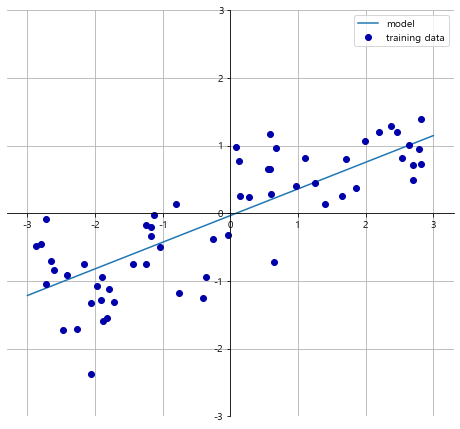

In [6]:
mglearn.plots.plot_linear_regression_wave()

In [7]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
print("훈련 점수 : ", lr.score(X_train, y_train))
print("테스트 점수 : ", lr.score(X_test, y_test))

print("기울기 : {}, 절편 : {}".format(lr.coef_, lr.intercept_))

훈련 점수 :  0.6700890315075756
테스트 점수 :  0.65933685968637
기울기 : [0.39390555], 절편 : -0.031804343026759746


In [13]:
from scipy import stats

result = stats.linregress(X_train.reshape(-1), y_train)
result

LinregressResult(slope=0.39390555116733944, intercept=-0.031804343026759774, rvalue=0.8185896600297219, pvalue=6.4641460612798074e-12, stderr=0.042149264068325865, intercept_stderr=0.07819620564438914)

### (1) 사례 1 : 전기 생산량과 소비량

+ 귀무 가설 : 전기 생산량과 소비량은 상관 관계가 없다.
+ 대립 가설 : 전기 생산량과 소비량은 상관 관계가 있다.

In [14]:
# 월별 전기 사용량(백만 Kwh)
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

# 월별 전기 생산금액(억원)
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]

In [15]:
##### 통계적 분석

result = stats.linregress(X, y)
result

LinregressResult(slope=0.4956032360182905, intercept=0.9195814280689418, rvalue=0.8929235125385305, pvalue=9.238421943157891e-05, stderr=0.07901935226531728, intercept_stderr=0.3110591892275586)

In [17]:
##### 머신 러닝
X_arr = np.array(X)
X_arr = X_arr.reshape(-1, 1)

lr = LinearRegression()
lr.fit(X_arr, y)

print("기울기 : {}, 절편 : {}".format(lr.coef_, lr.intercept_))

기울기 : [0.49560324], 절편 : 0.919581428068942


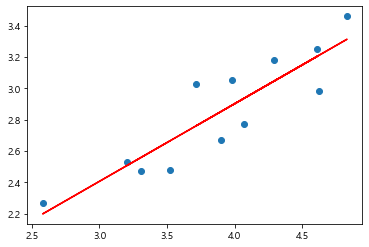

In [19]:
plt.scatter(X, y)
plt.plot(X, lr.coef_ * X + lr.intercept_, c="red")

In [22]:
##### 생산량이 5일때 사용량은 얼마나 될까?
print(lr.coef_ * 5 + lr.intercept_)
print(lr.predict([[5]]))

[3.39759761]
[3.39759761]


### (2) 사례2 : 보스턴 주택 가격

In [25]:
boston = load_boston()
print(boston.data.shape)
#print(boston.target)
print(boston.feature_names)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [26]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [28]:
print("훈련 점수 : ", lr.score(X_train, y_train))
print("테스트 점수 : ", lr.score(X_test, y_test))

훈련 점수 :  0.7697699488741149
테스트 점수 :  0.6354638433202129


In [6]:
from mglearn.datasets import load_extended_boston

X, y = load_extended_boston()
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 점수 : ", lr.score(X_train, y_train))
print("테스트 점수 : ", lr.score(X_test, y_test))

(506, 104)
훈련 점수 :  0.9520519609032729
테스트 점수 :  0.6074721959665803


### (3) 릿지(ridge) 회귀 모델

+ L2 규제(Regularization)
+ MSE항에 Penelty항을 추가
+ 알파를 크게 하면 페널티의 효과가 커지고, 작게하면 그 반대가 된다.
+ 모델을 단순하게 해주고 훈련셋에 대한 성능차이를 절충하는 효과

In [9]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)  # alpha=1.0

print("훈련 점수 : ", ridge.score(X_train, y_train))
print("테스트 점수 : ", ridge.score(X_test, y_test))

훈련 점수 :  0.885796658517094
테스트 점수 :  0.7527683481744752


In [10]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)  

print("훈련 점수 : ", ridge10.score(X_train, y_train))
print("테스트 점수 : ", ridge10.score(X_test, y_test))

훈련 점수 :  0.7882787115369616
테스트 점수 :  0.6359411489177311


In [11]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)  

print("훈련 점수 : ", ridge01.score(X_train, y_train))
print("테스트 점수 : ", ridge01.score(X_test, y_test))

훈련 점수 :  0.9282273685001985
테스트 점수 :  0.7722067936479811


(-25.0, 25.0)

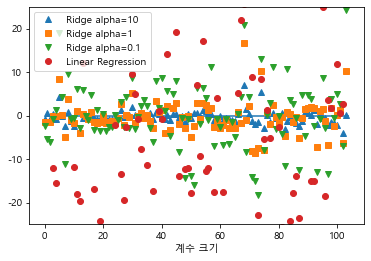

In [17]:
plt.plot(ridge10.coef_, "^", label="Ridge alpha=10")
plt.plot(ridge.coef_, "s", label="Ridge alpha=1")
plt.plot(ridge01.coef_, "v", label="Ridge alpha=0.1")
plt.plot(lr.coef_, "o", label="Linear Regression")

plt.legend()
plt.xlabel("계수 목록")
plt.xlabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)

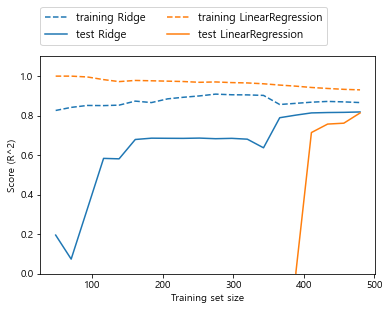

In [18]:
# 릿지의 경우 알파를 1로 고정
mglearn.plots.plot_ridge_n_samples()

In [22]:
print("사용한 특성의 수 : ", np.sum(ridge.coef_ != 0))
print("사용한 특성의 수 : ", np.sum(ridge10.coef_ != 0))
print("사용한 특성의 수 : ", np.sum(ridge01.coef_ != 0))

사용한 특성의 수 :  104
사용한 특성의 수 :  104
사용한 특성의 수 :  104


### (4) 라쏘(Lasso) 회귀모델

+ L1 규제 사용
+ 알파를 크게하면 페널티의 효과가 커지고 작게하면 그 반대가 된다.
+ 특성 선택이 자동으로 이루어진다.

In [19]:
from sklearn.linear_model import Lasso

In [21]:
lasso = Lasso().fit(X_train, y_train)

print("훈련 점수 : ", lasso.score(X_train, y_train))
print("테스트 점수 : ", lasso.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso.coef_ != 0))

훈련 점수 :  0.29323768991114607
테스트 점수 :  0.20937503255272294
사용한 특성의 수 :  4


In [23]:
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)

print("훈련 점수 : ", lasso001.score(X_train, y_train))
print("테스트 점수 : ", lasso001.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso001.coef_ != 0))

훈련 점수 :  0.8961122320864717
테스트 점수 :  0.7677995670886713
사용한 특성의 수 :  32


In [24]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)

print("훈련 점수 : ", lasso00001.score(X_train, y_train))
print("테스트 점수 : ", lasso00001.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso00001.coef_ != 0))

훈련 점수 :  0.9420931515237063
테스트 점수 :  0.6976541391663642
사용한 특성의 수 :  100


(-25.0, 25.0)

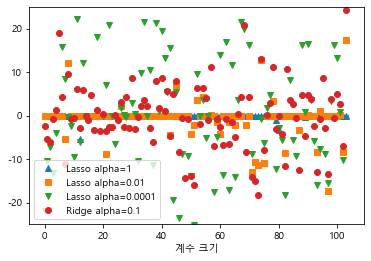

In [29]:
plt.plot(lasso.coef_, "^", label="Lasso alpha=1")
plt.plot(lasso001.coef_, "s", label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, "v", label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, "o", label="Ridge alpha=0.1")

plt.legend()
plt.xlabel("계수 목록")
plt.xlabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)

### (5) 예제

#### 1) 키에 따라서 몸무게가 얼마인지 예측하는 프로그램

In [30]:
df = pd.read_csv("data/heights.csv")
df

,height,weight
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30
...,...,...
195,65.80,120.84
196,66.11,115.78
197,68.24,128.30
198,68.02,127.47


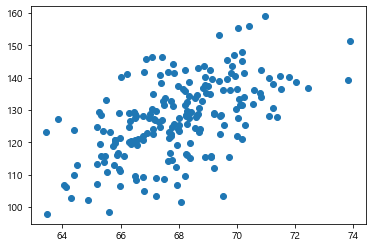

In [32]:
X = df["height"]
y = df["weight"]

plt.plot(X, y, 'o')

In [33]:
from scipy import stats

result = stats.linregress(X, y)
result

LinregressResult(slope=3.432676129271628, intercept=-106.02770644878126, rvalue=0.5568647346122992, pvalue=1.1029015151266264e-17, stderr=0.3638682118583795, intercept_stderr=24.734800508820637)

In [35]:
lr = LinearRegression()
lr.fit(X.values.reshape(-1, 1), y)

LinearRegression()

In [36]:
##### 키가 70인 사람의 몸무게는 얼마일까?
lr.predict([[70]])

array([134.2596226])

#### 2) Boston Housing Sample

In [ ]:
"""
속성	내용
-----------------
CRIM	범죄율
ZN	25,000평방피트당 주거지역의 비율
INDUS	비소매 상업지구 비율(단위: 에이커)
CHAS	찰스강에 인접해 있으면 1, 그렇지 않으면 0
NOX	일산화질소 농도(단위:0.1ppm)
RM	주택당 방의 수
AGE	1940년 이전에 건설된 주택의 비율
DIS	5개의 보스턴 직업고용센터와의 거리(가중 평균)
RAD	고속도로 접근성
TAX	재산세율
PTRATIO	학생/교사비율
B	흑인비율
LSTAT	하위계층비율
MEDV	타운의 주택 가격 중앙값(단위: 1,000달러
"""

In [40]:
boston = load_boston()
boston

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
print(X_train.shape, X_test.shape)

(379, 13) (127, 13)


In [43]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head(10)

df["MEDV"] = boston.target
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


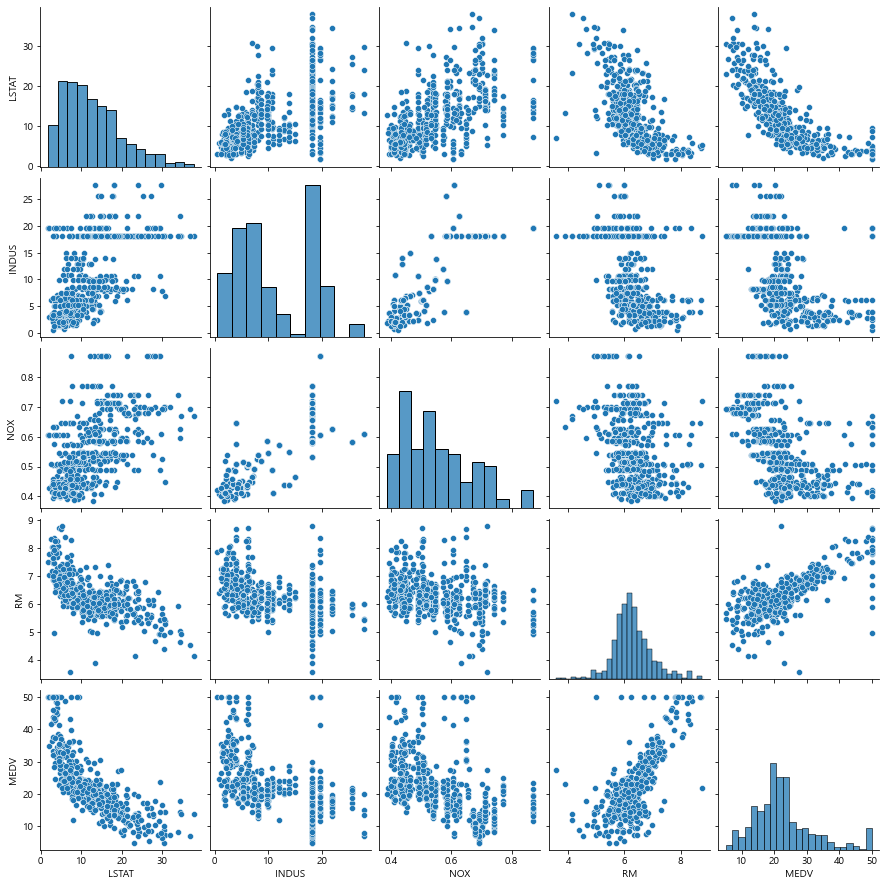

In [45]:
sns.pairplot(df[["LSTAT", "INDUS", "NOX", "RM", "MEDV"]], size=2.5)

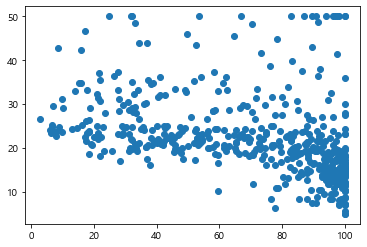

In [48]:
plt.scatter(df[["AGE"]], df[["MEDV"]])

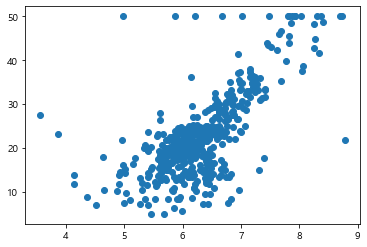

In [49]:
plt.scatter(df[["RM"]], df[["MEDV"]])

<AxesSubplot:>

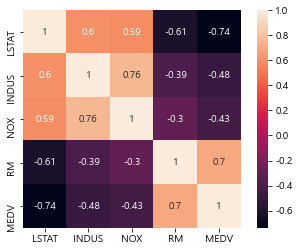

In [52]:
cols = ["LSTAT", "INDUS", "NOX", "RM", "MEDV"]
heat = np.corrcoef(df[cols].T)
sns.heatmap(heat, annot=True, yticklabels=cols, xticklabels=cols, square=True)

In [53]:
boston_model = LinearRegression()
boston_model.fit(X_train, y_train)

LinearRegression()

In [54]:
print("훈련 점수 : ", boston_model.score(X_train, y_train))
print("테스트 점수 : ", boston_model.score(X_test, y_test))

훈련 점수 :  0.7697699488741149
테스트 점수 :  0.6354638433202129


In [64]:
##### 방이 4개인 주택 가격은 얼마?

X = df[["RM"]].values
y = df[["MEDV"]].values

lr = LinearRegression().fit(X, y)

house_price = lr.predict([[4]])
house_price * 1000

array([[1737.81514828]])

#### 3) Mahattan Housing Sample

In [ ]:
"""
rental_id	rental ID
rent	임대료 ($)
bedrooms	침실수
bathrooms	화장실수
size_sqft	평수(feet)
min_to_subway	지하철과의 거리 (minutes)
floor	층수
building_age_yrs	건물 연령
no_fee	중계수수료 (0 for fee, 1 for no fee)
has_roofdeck	옥상 (o for no, 1 for yes)
has_washer_dryer	세탁기/건조기 (0/1)
has_doorman	도어맨 (0/1)
has_elevator	엘리베이터 (0/1)
has_dishwasher	식기세척기 (0/1)
has_patio	안마당(patio) (0/1)
has_gym	헬스장(gym) (0/1)
neighborhood	이웃 (ex: 한인타운)
submarket	submarket (ex: North Brooklyn)
borough	borough (ex: Brooklyn)
"""

In [66]:
df = pd.read_csv("data/manhattan.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


In [ ]:
##### 변수들의 관계를 시각화
##### 설명 계수(훈련 결과와 테스트 결과 비교)
##### 필요할 경우 릿지나 라쏘 구현
##### 임대료 계산 (예 : 1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0 -> 2309$)

---
# 2. 로지스틱 회귀 모델

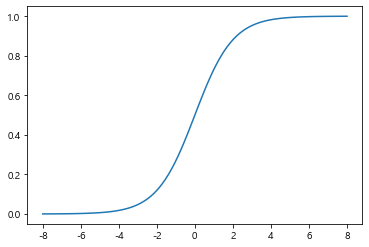

In [70]:
##### Sigmoid 그래프 그리기

X = np.linspace(-8, 8, 100)
plt.plot(X, 1 / (1 + np.exp(-X)))